In [1]:
import matplotlib.pyplot as plt
from numpy import zeros, arange, fft, linspace, pi, cos, sin, sqrt, array, log10, amax, linspace, log10, unwrap, angle, exp, arctan
from numpy.random import normal as noise_gaussian
from pathlib import Path
from math import radians
from os import listdir
from os.path import splitext
import ipywidgets as widgets
from IPython.display import display
from multiprocessing.pool import ThreadPool
from time import process_time
from scipy.signal import TransferFunction, bode, butter, filtfilt, freqs
%matplotlib widget

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
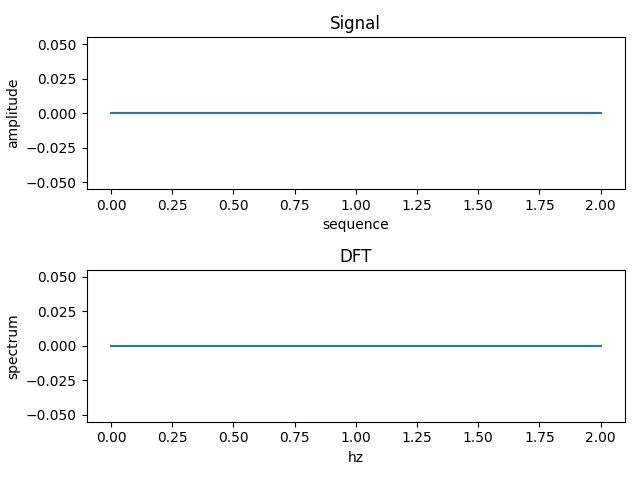

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
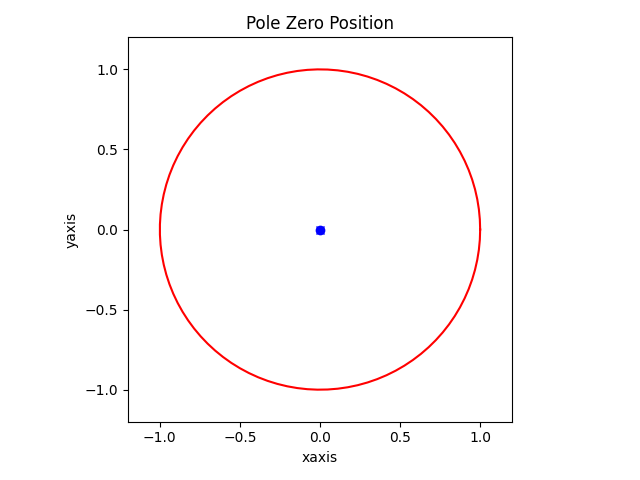

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
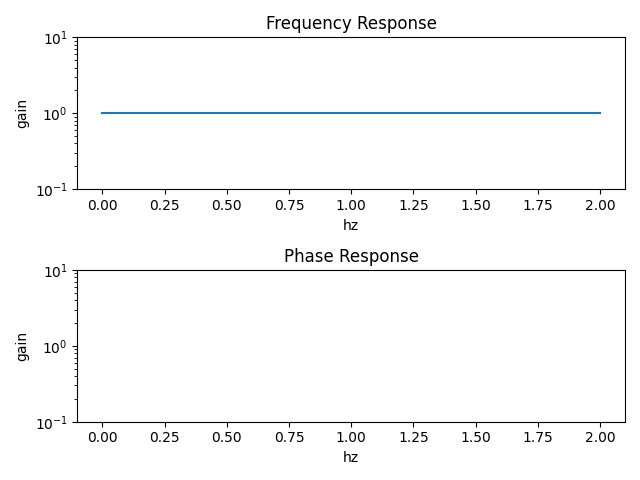

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
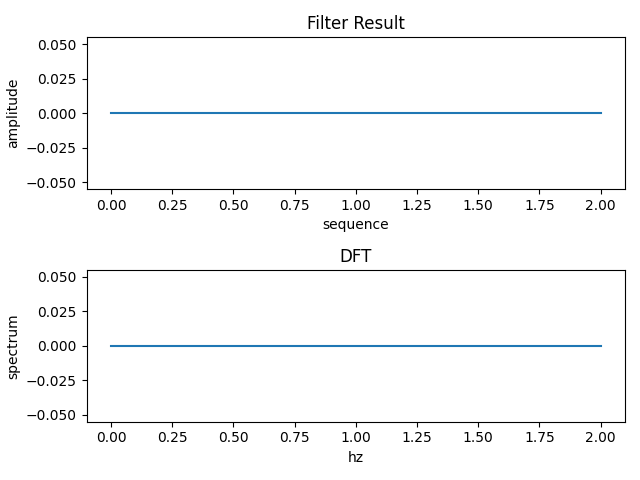

In [3]:
texts_0 = [[], []] # X(sequence) and Y(ecg signal) value

######################## DFT Function
def dft(data):
    length = len(data)
    amplitude_dft = []
    for i in range(length):
        temp = 0
        for j in range(length):
            temp += data[j]*exp(-2j*pi*i*j/length)
        amplitude_dft += [abs(temp)/length]
    return amplitude_dft

######################## Pole Zero Filter
def frequency_response_pole_zero(radius, teta, frequency_sampling):
    frequency_response = []
    x_position = radius * cos(teta * pi / 180)
    y_position_1 = radius * sin(teta * pi / 180)
    
    for i in range(frequency_sampling):
        w = 2 * pi * i / frequency_sampling
        numerator = sqrt((1 - cos(2 * w)) ** 2 + (sin(2 * w)) ** 2)
        denominator = sqrt((1 - 2 * x_position * cos(w)
                            + (radius ** 2) * cos(2 * w)) ** 2
                           + (2 * x_position * sin(w)
                              - (radius ** 2) * sin(2 * w)) ** 2)
        frequency_response += [numerator / denominator]      
    return x_position, y_position_1, frequency_response
def phase_response_pole_zero(radius, teta, frequency_sampling):
    phase_response = []
    x_position = radius * cos(teta * pi / 180)
    y_position_1 = radius * sin(teta * pi / 180)
    
    for i in range(frequency_sampling):
        w = 2 * pi * i / frequency_sampling
        numerator = 2*radius*cos(radians(teta))*sin(w) - radius**2*sin(2*w)
        denominator = 1 - 2*radius*cos(radians(teta))*cos(w) + radius**2*cos(2*w)
        phase_response += [-arctan(numerator / denominator)]      
    return x_position, y_position_1, phase_response
def pole_zero_filter(data, radius, teta):
    x_position = radius * cos(teta * pi / 180)
    result = []
    for i in range(len(data)):
        if i <= 2:
            result += [0]
            continue
        result += [data[i] + 2*x_position*cos(radians(teta))*result[i - 1] - radius**2 * result[i - 2]]
    return result

######################## File Select 
files = listdir(Path().absolute())
temp = []
for file in files:
    if splitext(file)[1] == ".txt":
        temp.append(file)
files = temp

######################## Widgets File Select
opening_select_signal = widgets.Text(value='Please select signal.', 
                       disabled=True)
select_signal = widgets.Select(
    options=files,
    description='Select First File:',
    disabled=False
)
button_select_signal = widgets.Button(description='Select Signal')
def on_button_select_signal_clicked(change):
    with open(select_signal.get_interact_value(), "r") as file:
        text_file = file.readlines()
    texts_0[0] = arange(len(text_file))
    try:
        texts_0[1] = [float(x.replace("\n", "")) for x in text_file]
    except ValueError:
        print("Please select single column data file. File Read Error!")
        return
    
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    frequency_sampling = select_frequency_sampling.get_interact_value()
    async_result_0 = pool.apply_async(dft, (texts_0[1],))
    dft_result = async_result_0.get()
    elapsed_time_0 = process_time() - t_0
    
    with out_0:
        plot_0.set_data(texts_0[0], texts_0[1])
        fig_0_ax[0].set_xlim([0, len(texts_0[0])])
        fig_0_ax[0].set_ylim([min(texts_0[1]), max(texts_0[1])])
        plot_1.set_data(linspace(0, frequency_sampling, len(texts_0[0])), dft_result)
        fig_0_ax[1].set_xlim([0, frequency_sampling//2])
        fig_0_ax[1].set_ylim([min(dft_result), max(dft_result)])
        
    with out_1:
        print("{} second".format(elapsed_time_0)) 
button_select_signal.on_click(on_button_select_signal_clicked)

######################## Widget Signal Variables
opening_sinus_signal = widgets.Text(value='Please input variables.', 
                       disabled=True)
select_signal_length = widgets.IntText(
    value=500,
    description='n:',
    disabled=False
)
select_frequency_sampling = widgets.IntText(
    value=500,
    description='fs:',
    disabled=False
)

######################## Widget Sinus Signal Variables
text_first_signal = widgets.Text(value='First Sinus Signal.', disabled=True)
select_frequency_first_signal = widgets.IntText(
    value=100,
    description='f:',
    disabled=False
)
select_amplitude_first_signal = widgets.IntText(
    value=10,
    description='A:',
    disabled=False
)
text_second_signal = widgets.Text(value='Second Sinus Signal.', disabled=True)
select_frequency_second_signal = widgets.IntText(
    value=150,
    description='f:',
    disabled=False
)
select_amplitude_second_signal = widgets.IntText(
    value=10,
    description='A:',
    disabled=False
)
text_noise = widgets.Text(value='White Noise.', disabled=True)
select_amplitude_noise = widgets.IntText(
    value=5,
    description='A:',
    disabled=False
)

######################## Widget Sinus Signal
button_sinus_signal = widgets.Button(description='Select Signal')
def on_button_sinus_signal_clicked(change):
    length = select_signal_length.get_interact_value()
    frequency_sampling = select_frequency_sampling.get_interact_value()
    frequency_first_signal = select_frequency_first_signal.get_interact_value()
    amplitude_first_signal = select_amplitude_first_signal.get_interact_value()
    frequency_second_signal = select_frequency_second_signal.get_interact_value()
    amplitude_second_signal = select_amplitude_second_signal.get_interact_value()
    amplitude_noise = select_amplitude_noise.get_interact_value()
    
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    time = length/frequency_sampling*pi
    first_signal = [x*amplitude_first_signal for x in sin(linspace(0, 2*pi*frequency_first_signal, length))]
    second_signal = [x*amplitude_second_signal for x in sin(linspace(0, 2*pi*frequency_second_signal, length))]
    noise_signal = noise_gaussian(0, amplitude_noise, length)
    texts_0[0] = linspace(0, time, length)
    texts_0[1] = [first_signal[x] + second_signal[x] + noise_signal[x] for x in range(length)]
    async_result_0 = pool.apply_async(dft, (texts_0[1],))
    dft_result = async_result_0.get()
    elapsed_time_0 = process_time() - t_0
    
    with out_0:
        plot_0.set_data(arange(len(texts_0[1])), texts_0[1])
        fig_0_ax[0].set_xlim([0, len(texts_0[1])])
        fig_0_ax[0].set_ylim([min(texts_0[1]), max(texts_0[1])])
        plot_1.set_data(arange(length), dft_result)
        fig_0_ax[1].set_xlim([0, frequency_sampling//2])
        fig_0_ax[1].set_ylim([min(dft_result), max(dft_result)])
    
    with out_2:
        print("{} second".format(elapsed_time_0)) 
button_sinus_signal.on_click(on_button_sinus_signal_clicked)

######################## Widget Filter Variables
text_first_signal = widgets.Text(value='Select Pole Zero Filter Variables', disabled=True)
float_radius = widgets.FloatText(
    value=0.99,
    step=0.01,
    description='Radius:',
    disabled=False
)
int_teta = widgets.IntText(
    value=0,
    description='Teta:',
    disabled=False
)

######################## Widget Pole Zero Filter
button_pole_zero = widgets.Button(description='Plot Pole Zero')
def on_button_pole_zero_clicked(change):
    length = select_signal_length.get_interact_value()
    frequency_sampling = select_frequency_sampling.get_interact_value()
    radius = float_radius.get_interact_value()
    teta = int_teta.get_interact_value()
    
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    x_position, y_position_1, frequency_response = frequency_response_pole_zero(
            radius, 
            teta, 
            frequency_sampling)
    x_position, y_position_1, phase_response = phase_response_pole_zero(
            radius, 
            teta, 
            frequency_sampling)
    result_pole_zero = pole_zero_filter(texts_0[1], radius, teta)
    async_result_0 = pool.apply_async(dft, (result_pole_zero,))
    dft_result = async_result_0.get()
    elapsed_time_0 = process_time() - t_0
    
    with out_3:
        plot_2.set_data(arange(len(frequency_response)//2),
                       frequency_response[:len(frequency_response)//2])
        fig_1_ax[0].set_xlim([0, len(frequency_response)//2])
        plot_3.set_data(arange(len(phase_response)//2),
                       phase_response[:len(phase_response)//2])
        fig_1_ax[1].set_xlim([0, len(phase_response)//2])

    with out_4:
        plot_5.set_data([x_position], [y_position_1])
        
    with out_5:
        plot_7.set_data(texts_0[0], result_pole_zero)
        fig_3_ax[0].set_xlim([0, max(texts_0[0])])
        fig_3_ax[0].set_ylim([min(result_pole_zero), max(result_pole_zero)])
        plot_8.set_data(arange(length), dft_result)
        fig_3_ax[1].set_xlim([0, frequency_sampling//2])
        fig_3_ax[1].set_ylim([min(dft_result), max(dft_result)])
        
    with out_6:
        print("{} second".format(elapsed_time_0)) 
button_pole_zero.on_click(on_button_pole_zero_clicked)
    
######################## Widget Outputs
out_0 = widgets.Output()
with out_0:
    try:
        plt.close(fig_0)
    except:
        pass
    fig_0, fig_0_ax = plt.subplots(nrows=2, ncols=1)
    fig_0_ax[0].set(xlabel="sequence", ylabel="amplitude", title="Signal")
    fig_0_ax[1].set(xlabel="hz", ylabel="spectrum", title="DFT")
    plot_0, = fig_0_ax[0].plot([0,1,2], [0,0,0])
    plot_1, = fig_0_ax[1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
out_1 = widgets.Output()
out_2 = widgets.Output()
out_3 = widgets.Output()
with out_3:
    try:
        plt.close(fig_2)
    except:
        pass
    fig_2, fig_2_ax = plt.subplots(nrows=1, ncols=1)
    fig_2_ax.set(xlabel="xaxis", ylabel="yaxis", title="Pole Zero Position")
    plot_4, = fig_2_ax.plot(cos(linspace(0, 2 * pi, 100)), sin(linspace(0, 2 * pi, 100)), color="red")
    plot_5, = fig_2_ax.plot([0], [0], marker="x", color="blue")
    plot_6, = fig_2_ax.plot([0], [0], marker="o", color="blue")
    fig_2_ax.set_xlim([-1.2, 1.2])
    fig_2_ax.set_ylim([-1.2, 1.2])
    fig_2_ax.set_aspect('equal')
    plt.tight_layout()
out_4 = widgets.Output()
with out_4:
    try:
        plt.close(fig_1)
    except:
        pass
    fig_1, fig_1_ax = plt.subplots(nrows=2, ncols=1)
    fig_1_ax[0].set(xlabel="hz", ylabel="gain", title="Frequency Response", yscale= "log")
    fig_1_ax[0].set_ylim([10**(-1), 10**(1)])
    fig_1_ax[1].set(xlabel="hz", ylabel="gain", title="Phase Response", yscale= "log")
    fig_1_ax[1].set_ylim([10**(-1), 10**(1)])
    plot_2, = fig_1_ax[0].plot([0,1,2], [1,1,1])
    plot_3, = fig_1_ax[1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
out_5 = widgets.Output()
with out_5: 
    try:
        plt.close(fig_3)
    except:
        pass
    fig_3, fig_3_ax = plt.subplots(nrows=2, ncols=1)
    fig_3_ax[0].set(xlabel="sequence", ylabel="amplitude", title="Filter Result")
    fig_3_ax[1].set(xlabel="hz", ylabel="spectrum", title="DFT")
    plot_7, = fig_3_ax[0].plot([0,1,2], [0,0,0])
    plot_8, = fig_3_ax[1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
out_6 = widgets.Output()
horizontal_box_0 = widgets.HBox([button_select_signal, out_1])
horizontal_box_1 = widgets.HBox([button_sinus_signal, out_2])
horizontal_box_2 = widgets.HBox([button_pole_zero, out_6])
vertical_box_0 = widgets.VBox([opening_select_signal, 
                               select_frequency_sampling,
                               select_signal, 
                               horizontal_box_0])
vertical_box_1 = widgets.VBox([opening_sinus_signal,
                               select_signal_length,
                               select_frequency_sampling,
                               text_first_signal,
                               select_frequency_first_signal,
                               select_amplitude_first_signal,
                               text_second_signal,
                               select_frequency_second_signal,
                               select_amplitude_second_signal,
                               text_noise,
                               select_amplitude_noise,
                               horizontal_box_1])
vertical_box_2 = widgets.VBox([select_frequency_sampling, 
                               float_radius,
                               int_teta, 
                               horizontal_box_2])
horizontal_box_2 = widgets.HBox([vertical_box_0, vertical_box_1, out_0])
horizontal_box_3 = widgets.HBox([vertical_box_2, out_3])
horizontal_box_4 = widgets.HBox([out_4, out_5])
display(horizontal_box_2, horizontal_box_3, horizontal_box_4)


In [9]:
texts_0 = [[], []] # X(sequence) and Y(ecg signal) value

######################## DFT Function
def dft(data):
    length = len(data)
    amplitude_dft = []
    for i in range(length):
        temp = 0
        for j in range(length):
            temp += data[j]*exp(-2j*pi*i*j/length)
        amplitude_dft += [abs(temp)/length]
    return amplitude_dft

######################## Low Pass Function
def phase_response_low_pass(frequency_sampling, frequency_cutoff):
    nyquist_frequency_sampling = 0.5 * frequency_sampling
    constant = frequency_cutoff / nyquist_frequency_sampling
    numerator, denominator = butter(2, constant, "lowpass", analog=False)
    normalized, frequency_response = freqs(numerator, denominator)
    phase_response = unwrap(angle(frequency_response))
    return normalized, phase_response
def frequency_response_low_pass(frequency_sampling, frequency_cutoff):
    nyquist_frequency_sampling = 0.5 * frequency_sampling
    constant = frequency_cutoff / nyquist_frequency_sampling
    numerator, denominator = butter(2, constant, "lowpass", analog=False)
    normalized, frequency_response = freqs(numerator, denominator)
    return normalized, frequency_response
def low_pass_filter(data, frequency_sampling, frequency_cutoff):
    a = []
    b = []
    result = []
    c = 0
    period = 1 / frequency_sampling
    wc = 2 * pi * frequency_cutoff
    a += [wc**2 / (4/period**2 + 2*sqrt(2)*wc/period + wc**2)]
    a += [2*wc**2 / (4/period**2 + 2*sqrt(2)*wc/period + wc**2)]
    a += [wc**2 / (4/period**2 + 2*sqrt(2)*wc/period + wc**2)]
    b += [0]
    b += [(8/period**2 - 2*wc**2) / (4/period**2 + 2*sqrt(2)*wc/period + wc**2)]
    b += [-(4/period**2 - 2*sqrt(2)*wc/period + wc**2) / (4/period**2 + 2*sqrt(2)*wc/period + wc**2)]
    result += [a[0]*data[0]]
    result += [b[1]*result[0] + a[0]*data[1] + a[1]*data[0]]
    for i in range(2, len(data)):
        for j in range(1,3):
            c += b[j]*result[i-j]
        for j in range(3):
            c += a[j]*data[i-j]
        result += [c]
        c = 0
    return result
    

######################## File Select 
files = listdir(Path().absolute())
temp = []
for file in files:
    if splitext(file)[1] == ".txt":
        temp.append(file)
files = temp

######################## Widgets File Select
opening_select_signal = widgets.Text(value='Please select signal.', 
                       disabled=True)
select_signal = widgets.Select(
    options=files,
    description='Select First File:',
    disabled=False
)
button_select_signal = widgets.Button(description='Select Signal')
def on_button_select_signal_clicked(change):
    with open(select_signal.get_interact_value(), "r") as file:
        text_file = file.readlines()
    texts_0[0] = arange(len(text_file))
    try:
        texts_0[1] = [float(x.replace("\n", "")) for x in text_file]
    except ValueError:
        print("Please select single column data file. File Read Error!")
        return
    
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    frequency_sampling = select_frequency_sampling.get_interact_value()
    async_result_0 = pool.apply_async(dft, (texts_0[1],))
    dft_result = async_result_0.get()
    elapsed_time_0 = process_time() - t_0
    
    with out_0:
        plot_0.set_data(texts_0[0], texts_0[1])
        fig_0_ax[0].set_xlim([0, len(texts_0[0])])
        fig_0_ax[0].set_ylim([min(texts_0[1]), max(texts_0[1])])
        plot_1.set_data(linspace(0, frequency_sampling, len(texts_0[0])), dft_result)
        fig_0_ax[1].set_xlim([0, frequency_sampling//2])
        fig_0_ax[1].set_ylim([min(dft_result), max(dft_result)])
        
    with out_1:
        print("{} second".format(elapsed_time_0)) 
button_select_signal.on_click(on_button_select_signal_clicked)

######################## Widget Signal Variables
opening_sinus_signal = widgets.Text(value='Please input variables.', 
                       disabled=True)
select_signal_length = widgets.IntText(
    value=500,
    description='n:',
    disabled=False
)
select_frequency_sampling = widgets.IntText(
    value=500,
    description='fs:',
    disabled=False
)

######################## Widget Sinus Signal Variables
text_first_signal = widgets.Text(value='First Sinus Signal.', disabled=True)
select_frequency_first_signal = widgets.IntText(
    value=100,
    description='f:',
    disabled=False
)
select_amplitude_first_signal = widgets.IntText(
    value=10,
    description='A:',
    disabled=False
)
text_second_signal = widgets.Text(value='Second Sinus Signal.', disabled=True)
select_frequency_second_signal = widgets.IntText(
    value=150,
    description='f:',
    disabled=False
)
select_amplitude_second_signal = widgets.IntText(
    value=10,
    description='A:',
    disabled=False
)
text_noise = widgets.Text(value='White Noise.', disabled=True)
select_amplitude_noise = widgets.IntText(
    value=5,
    description='A:',
    disabled=False
)

######################## Widget Sinus Signal
button_sinus_signal = widgets.Button(description='Select Signal')
def on_button_sinus_signal_clicked(change):
    length = select_signal_length.get_interact_value()
    frequency_sampling = select_frequency_sampling.get_interact_value()
    frequency_first_signal = select_frequency_first_signal.get_interact_value()
    amplitude_first_signal = select_amplitude_first_signal.get_interact_value()
    frequency_second_signal = select_frequency_second_signal.get_interact_value()
    amplitude_second_signal = select_amplitude_second_signal.get_interact_value()
    amplitude_noise = select_amplitude_noise.get_interact_value()
    
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    time = length/frequency_sampling*pi
    first_signal = [x*amplitude_first_signal for x in sin(linspace(0, 2*pi*frequency_first_signal, length))]
    second_signal = [x*amplitude_second_signal for x in sin(linspace(0, 2*pi*frequency_second_signal, length))]
    noise_signal = noise_gaussian(0, amplitude_noise, length)
    texts_0[0] = linspace(0, time, length)
    texts_0[1] = [first_signal[x] + second_signal[x] + noise_signal[x] for x in range(length)]
    async_result_0 = pool.apply_async(dft, (texts_0[1],))
    dft_result = async_result_0.get()
    elapsed_time_0 = process_time() - t_0
    
    with out_0:
        plot_0.set_data(arange(len(texts_0[1])), texts_0[1])
        fig_0_ax[0].set_xlim([0, len(texts_0[1])])
        fig_0_ax[0].set_ylim([min(texts_0[1]), max(texts_0[1])])
        plot_1.set_data(arange(length), dft_result)
        fig_0_ax[1].set_xlim([0, frequency_sampling//2])
        fig_0_ax[1].set_ylim([min(dft_result), max(dft_result)])
    
    with out_2:
        print("{} second".format(elapsed_time_0)) 
button_sinus_signal.on_click(on_button_sinus_signal_clicked)

######################## Widget Filter Variables
text_low_pass_variables = widgets.Text(value='Select Low Pass Filter Variables', disabled=True)
select_frequency_cutoff = widgets.FloatText(
    value=25,
    step=0.01,
    description='fc:',
    disabled=False
)

######################## Widget Pole Zero Filter
button_low_pass = widgets.Button(description='Plot Low Pass')
def on_button_low_pass_clicked(change):
    length = select_signal_length.get_interact_value()
    frequency_sampling = select_frequency_sampling.get_interact_value()
    frequency_cutoff = select_frequency_cutoff.get_interact_value()
    
    pool = ThreadPool(processes=4)
    t_0 = process_time()
    result_low_pass = low_pass_filter(texts_0[1], frequency_sampling, frequency_cutoff)
    normalized, frequency_response = frequency_response_low_pass(frequency_sampling, frequency_cutoff)
    normalized, phase_response = phase_response_low_pass(frequency_sampling, frequency_cutoff)
    async_result_0 = pool.apply_async(dft, (result_low_pass,))
    dft_result = async_result_0.get()
    elapsed_time_0 = process_time() - t_0
    
    with out_3:
        plot_2.set_data(normalized,abs(20 * log10(abs(frequency_response))))
        fig_1_ax[0].relim()   
        fig_1_ax[0].autoscale_view()
        plot_3.set_data(normalized, phase_response)
        fig_1_ax[1].relim()   
        fig_1_ax[1].autoscale_view()
        
    with out_4:
        plot_4.set_data(texts_0[0], result_low_pass)
        fig_2_ax[0].relim()   
        fig_2_ax[0].autoscale_view()
        plot_5.set_data(arange(length), dft_result)
        fig_2_ax[1].relim()   
        fig_2_ax[1].autoscale_view()
        
    with out_5:
        print("{} second".format(elapsed_time_0)) 
button_low_pass.on_click(on_button_low_pass_clicked)
    
######################## Widget Outputs
out_0 = widgets.Output()
with out_0:
    try:
        plt.close(fig_0)
    except:
        pass
    fig_0, fig_0_ax = plt.subplots(nrows=2, ncols=1)
    fig_0_ax[0].set(xlabel="sequence", ylabel="amplitude", title="Signal")
    fig_0_ax[1].set(xlabel="hz", ylabel="spectrum", title="DFT")
    plot_0, = fig_0_ax[0].plot([0,1,2], [0,0,0])
    plot_1, = fig_0_ax[1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
out_1 = widgets.Output()
out_2 = widgets.Output()
out_3 = widgets.Output()
with out_3:
    try:
        plt.close(fig_1)
    except:
        pass
    fig_1, fig_1_ax = plt.subplots(nrows=2, ncols=1)
    fig_1_ax[0].set(xlabel="radians/second", ylabel="gain", title="Frequency Response", yscale= "log")
    fig_1_ax[0].set_ylim([10**(-1), 10**(1)])
    fig_1_ax[1].set(xlabel="radians/second", ylabel="gain", title="Phase Response", yscale= "log")
    fig_1_ax[1].set_ylim([10**(-1), 10**(1)])
    plot_2, = fig_1_ax[0].plot([0,1,2], [1,1,1])
    plot_3, = fig_1_ax[1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
out_4 = widgets.Output()
with out_4: 
    try:
        plt.close(fig_2)
    except:
        pass
    fig_2, fig_2_ax = plt.subplots(nrows=2, ncols=1)
    fig_2_ax[0].set(xlabel="sequence", ylabel="amplitude", title="Filter Result")
    fig_2_ax[1].set(xlabel="hz", ylabel="spectrum", title="DFT")
    plot_4, = fig_2_ax[0].plot([0,1,2], [0,0,0])
    plot_5, = fig_2_ax[1].plot([0,1,2], [0,0,0])
    plt.tight_layout()
out_5 = widgets.Output()
horizontal_box_0 = widgets.HBox([button_select_signal, out_1])
horizontal_box_1 = widgets.HBox([button_sinus_signal, out_2])
horizontal_box_2 = widgets.HBox([button_low_pass, out_5])
vertical_box_0 = widgets.VBox([opening_select_signal, 
                               select_frequency_sampling,
                               select_signal, 
                               horizontal_box_0])
vertical_box_1 = widgets.VBox([opening_sinus_signal,
                               select_signal_length,
                               select_frequency_sampling,
                               text_first_signal,
                               select_frequency_first_signal,
                               select_amplitude_first_signal,
                               text_second_signal,
                               select_frequency_second_signal,
                               select_amplitude_second_signal,
                               text_noise,
                               select_amplitude_noise,
                               horizontal_box_1])
vertical_box_2 = widgets.VBox([text_low_pass_variables,
                               select_frequency_sampling, 
                               select_frequency_cutoff,
                               horizontal_box_2])
horizontal_box_2 = widgets.HBox([vertical_box_0, vertical_box_1, out_0])
horizontal_box_3 = widgets.HBox([vertical_box_2, out_3])
horizontal_box_4 = widgets.HBox([out_4])
display(horizontal_box_2, horizontal_box_3, horizontal_box_4)
